In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [ ]:
#read data 
instagram_data = pd.read_csv(r'/content/drive/MyDrive/PCD/Instagram User Stats.csv')
#instagram_data.drop('id', axis = 1, inplace = True)
lpos=[]
lflr=[]
lflg=[]
leg=[]
ler=[]
lfg=[]
lop=[]
for i in instagram_data.index:
  if (instagram_data['id'][i]<=10000):
    lpos.append(instagram_data['pos'][i])
    lflr.append(instagram_data['flr'][i])
    lflg.append(instagram_data['flg'][i])
    leg.append(instagram_data['eg'][i])
    ler.append(instagram_data['er'][i])
    lfg.append(instagram_data['fg'][i])
    lop.append(instagram_data['op'][i])
  else:
    break    
df=pd.DataFrame({"pos":lpos,
                "flr":lflr,
                "flg":lflg,"eg":leg,"er":leg,"fg":lfg,"op":lop,}) 
scaler = StandardScaler()
instagram_data_scaled = scaler.fit_transform(df)

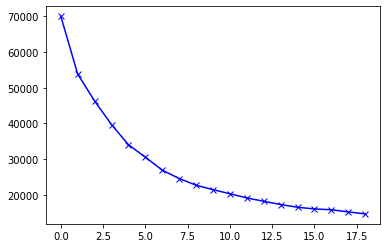

In [ ]:
#elbow method(choose the optimal k)
score_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(instagram_data_scaled)
    score_2.append(kmeans.inertia_)
plt.plot(score_2, 'bx-')

In [ ]:
#kmeans algorithm
import sklearn
kmeans = KMeans(7)
kmeans.fit(instagram_data_scaled)
labels = kmeans.labels_
silhouette_avg = silhouette_score(instagram_data_scaled, labels)
print(silhouette_avg)
Davies_instagram= sklearn.metrics.davies_bouldin_score(instagram_data_scaled, labels)
print(Davies_instagram)
Calinski_Harabaz=metrics.calinski_harabasz_score(instagram_data_scaled, labels)  
print(Calinski_Harabaz)

0.26404284301781034
1.080151585157673
2665.9010679849002


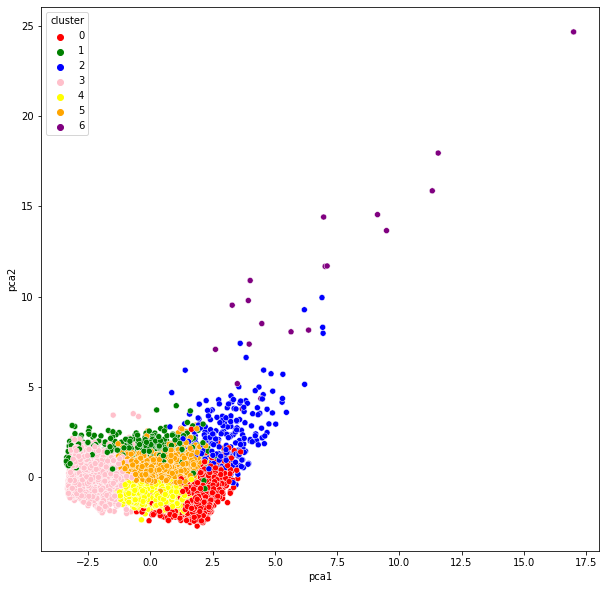

In [ ]:
#show data
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(instagram_data_scaled)
principal_comp
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df[(pca_df['pca2'] < 50) & (pca_df['pca1'] < 50)], palette = ['red','green','blue','pink','yellow','orange','purple'])